## Лабораторая работа 8

**Задача:** Применить вращение факторов и интерпетировать полученные результаты


### Описание датасета "Predict Online Gaming Behavior Dataset"
Этот набор данных фиксирует комплексные метрики и демографию, связанные с поведением игроков в онлайн-игровых средах. Он включает такие переменные, как демография игроков, детали, характерные для игры, метрики вовлеченности и целевую переменную, отражающую удержание игроков.


| **Переменная** | **Описание** |
|----------------|--------------|
| **PlayerID**   | Уникальный идентификатор для каждого игрока. |
| **Age**        | Возраст игрока. |
| **Gender**     | Пол игрока. |
| **Location**   | Географическое местоположение игрока. |
| **GameGenre**  | Жанр игры, в которой участвует игрок. |
| **PlayTimeHours** | Среднее количество часов, проведенных за игрой за одну сессию. |
| **InGamePurchases** | Признак того, делает ли игрок внутриигровые покупки (0 — Нет, 1 — Да). |
| **GameDifficulty** | Уровень сложности игры. |
| **SessionsPerWeek** | Количество игровых сессий в неделю. |
| **AvgSessionDurationMinutes** | Средняя продолжительность каждой игровой сессии в минутах. |
| **PlayerLevel** | Текущий уровень игрока в игре. |
| **AchievementsUnlocked** | Количество достижений, разблокированных игроком. |
| **EngagementLevel** | Категоризированный уровень вовлеченности, отражающий удержание игроков ('Высокий', 'Средний', 'Низкий'). |


Целевая переменная — EngagementLevel — указывает на уровень вовлеченности игрока и категоризируется как 'Высокий', 'Средний' или 'Низкий'.

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import FactorAnalysis
from sklearn.preprocessing import StandardScaler
from factor_analyzer import FactorAnalyzer
from factor_analyzer.rotator import Rotator


### Преобразование данных

In [ ]:
df = pd.read_csv('../online_gaming_behavior_dataset.csv')

engagement_map = {'Low': 0, 'Medium': 1, 'High': 2}
difficult_map = {'Easy': 0, 'Medium': 1, 'Hard': 2}
df['EngagementLevel'] = df['EngagementLevel'].map(engagement_map)
df['GameDifficulty'] = df['GameDifficulty'].map(difficult_map)

columns_to_use = ["Age", "PlayTimeHours", "InGamePurchases", "SessionsPerWeek", "AvgSessionDurationMinutes", "PlayerLevel", "AchievementsUnlocked", "GameDifficulty"]#, "EngagementLevel"]
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df[columns_to_use])

### Корреляция 

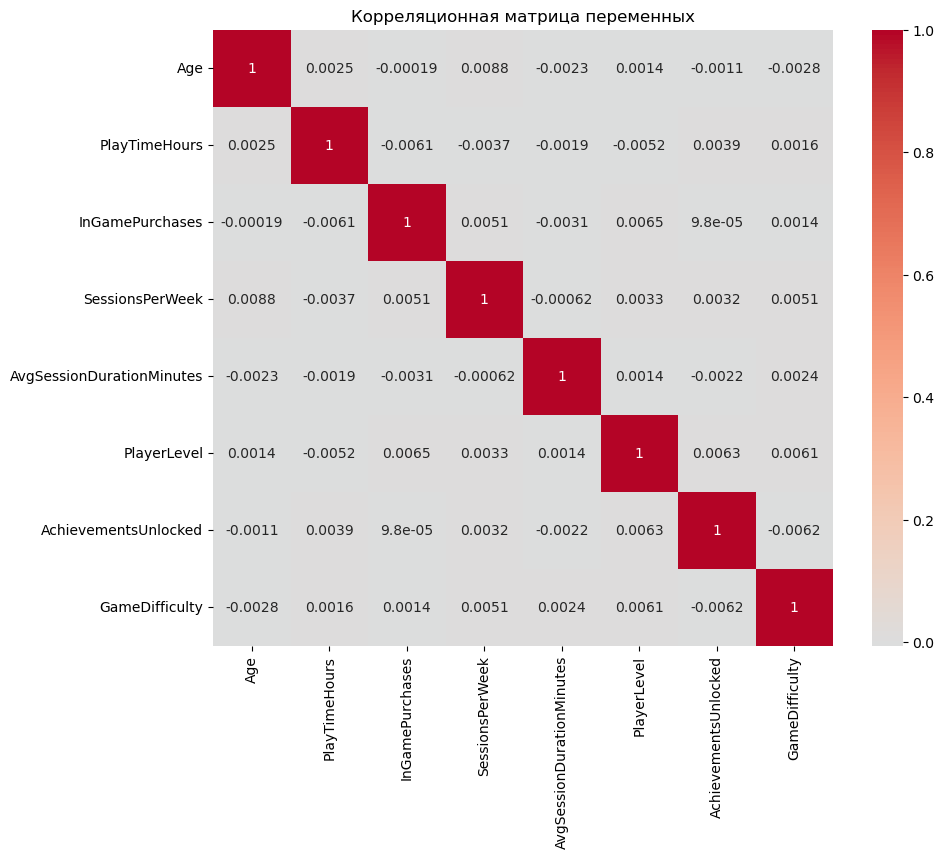

In [15]:
corr_matrix = pd.DataFrame(data_scaled, columns=columns_to_use).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Корреляционная матрица переменных')
plt.show()

### Метод "каменистой осыпи"

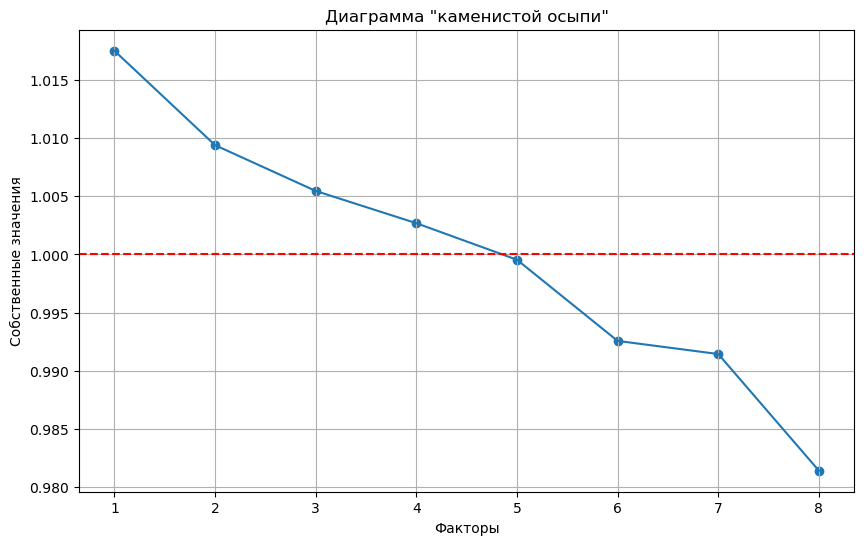

Рекомендуемое количество факторов по критерию Кайзера: 4


In [ ]:
# Метод "каменистой осыпи"
fa = FactorAnalyzer(rotation=None, impute="drop", n_factors=len(columns_to_use))
fa.fit(data_scaled)

ev, v = fa.get_eigenvalues()
plt.figure(figsize=(10, 6))
plt.scatter(range(1, len(columns_to_use)+1), ev)
plt.plot(range(1, len(columns_to_use)+1), ev)
plt.title('Диаграмма "каменистой осыпи"')
plt.xlabel('Факторы')
plt.ylabel('Собственные значения')
plt.axhline(y=1, color='r', linestyle='--')
plt.grid()
plt.show()

# Критерий Кайзера
n_factors = sum(ev > 1)
print(f"Рекомендуемое количество факторов по критерию Кайзера: {n_factors}")

### Факторный анализ с Varimax вращением


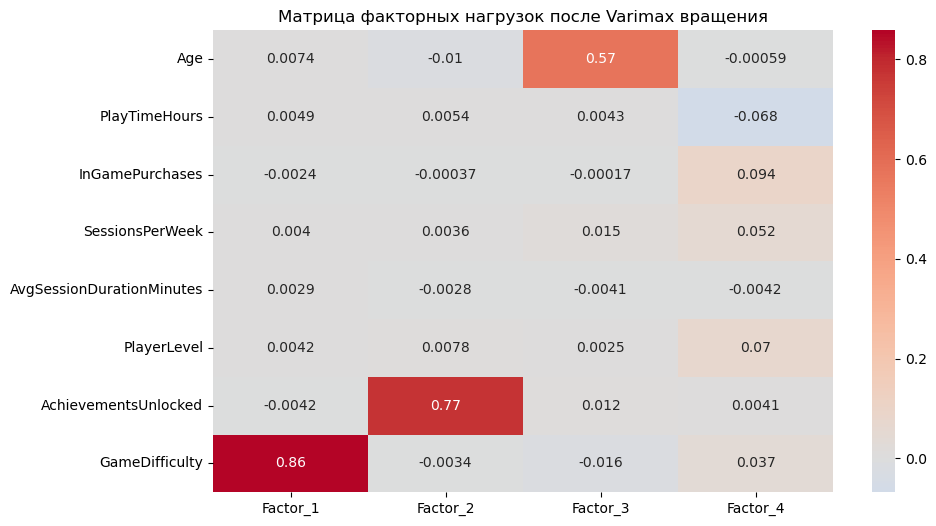


Общности переменных после Varimax вращения:
                           Общности
Age                        0.324528
PlayTimeHours              0.004722
InGamePurchases            0.008781
SessionsPerWeek            0.003021
AvgSessionDurationMinutes  0.000051
PlayerLevel                0.004964
AchievementsUnlocked       0.598026
GameDifficulty             0.738054


In [ ]:
fa_varimax = FactorAnalyzer(rotation='varimax', n_factors=n_factors, method='ml')
fa_varimax.fit(data_scaled)

# Факторные нагрузки
loadings_varimax = pd.DataFrame(
    fa_varimax.loadings_,
    index=columns_to_use,
    columns=[f'Factor_{i+1}' for i in range(n_factors)]
)

plt.figure(figsize=(10, 6))
sns.heatmap(loadings_varimax, cmap='coolwarm', center=0, annot=True)
plt.title('Матрица факторных нагрузок после Varimax вращения')
plt.show()

communalities_varimax = pd.DataFrame(
    fa_varimax.get_communalities(),
    index=columns_to_use,
    columns=['Общности']
)
print("\nОбщности переменных после Varimax вращения:")
print(communalities_varimax)

### Факторный анализ с Oblimin вращением


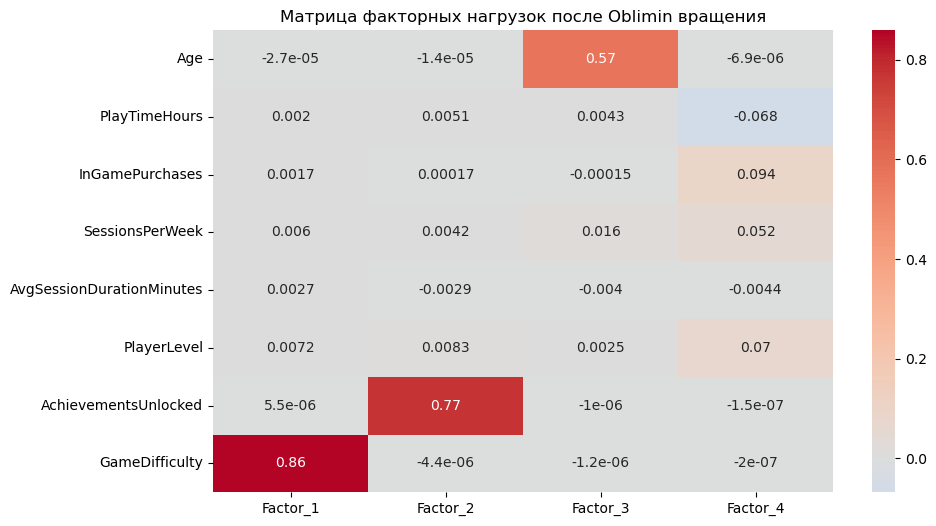


Общности переменных после Oblimin вращения:
                           Общности
Age                        0.324527
PlayTimeHours              0.004721
InGamePurchases            0.008781
SessionsPerWeek            0.003025
AvgSessionDurationMinutes  0.000051
PlayerLevel                0.004966
AchievementsUnlocked       0.598026
GameDifficulty             0.738054

Корреляции между факторами после Oblimin вращения:
          Factor_1  Factor_2  Factor_3  Factor_4
Factor_1  1.000000 -0.009401 -0.005590 -0.000151
Factor_2 -0.009401  1.000000 -0.002472 -0.000261
Factor_3 -0.005590 -0.002472  1.000000 -0.001392
Factor_4 -0.000151 -0.000261 -0.001392  1.000000


In [ ]:
fa_oblimin = FactorAnalyzer(rotation='oblimin', n_factors=n_factors, method='ml')
fa_oblimin.fit(data_scaled)

loadings_oblimin = pd.DataFrame(
    fa_oblimin.loadings_,
    index=columns_to_use,
    columns=[f'Factor_{i+1}' for i in range(n_factors)]
)

plt.figure(figsize=(10, 6))
sns.heatmap(loadings_oblimin, cmap='coolwarm', center=0, annot=True)
plt.title('Матрица факторных нагрузок после Oblimin вращения')
plt.show()

communalities_oblimin = pd.DataFrame(
    fa_oblimin.get_communalities(),
    index=columns_to_use,
    columns=['Общности']
)
print("\nОбщности переменных после Oblimin вращения:")
print(communalities_oblimin)

factor_correlations = pd.DataFrame(
    fa_oblimin.phi_,
    index=[f'Factor_{i+1}' for i in range(n_factors)],
    columns=[f'Factor_{i+1}' for i in range(n_factors)]
)
print("\nКорреляции между факторами после Oblimin вращения:")
print(factor_correlations)

### Интерпретация результатов

In [ ]:
def interpret_factors(loadings, rotation_type):
    print(f"\nИнтерпретация факторов после {rotation_type} вращения:")
    
    for factor in loadings.columns:
        print(f"\nФактор {factor}:")
        significant_vars = loadings[abs(loadings[factor]) > 0.5][factor]
        significant_vars = significant_vars.sort_values(ascending=False)
        
        for var, loading in significant_vars.items():
            print(f"- {var} (нагрузка: {loading:.2f})")
        
        if len(significant_vars) == 0:
            print("Нет переменных с высокой нагрузкой (> |0.5|)")

In [22]:
# Интерпретация Varimax факторов
interpret_factors(loadings_varimax, 'Varimax')



Интерпретация факторов после Varimax вращения:

Фактор Factor_1:
- GameDifficulty (нагрузка: 0.86)

Фактор Factor_2:
- AchievementsUnlocked (нагрузка: 0.77)

Фактор Factor_3:
- Age (нагрузка: 0.57)

Фактор Factor_4:
Нет переменных с высокой нагрузкой (> |0.5|)


In [ ]:
# Интерпретация Oblimin факторов
interpret_factors(loadings_oblimin, 'Oblimin')


Интерпретация факторов после Oblimin вращения:

Фактор Factor_1:
- GameDifficulty (нагрузка: 0.86)

Фактор Factor_2:
- AchievementsUnlocked (нагрузка: 0.77)

Фактор Factor_3:
- Age (нагрузка: 0.57)

Фактор Factor_4:
Нет переменных с высокой нагрузкой (> |0.5|)


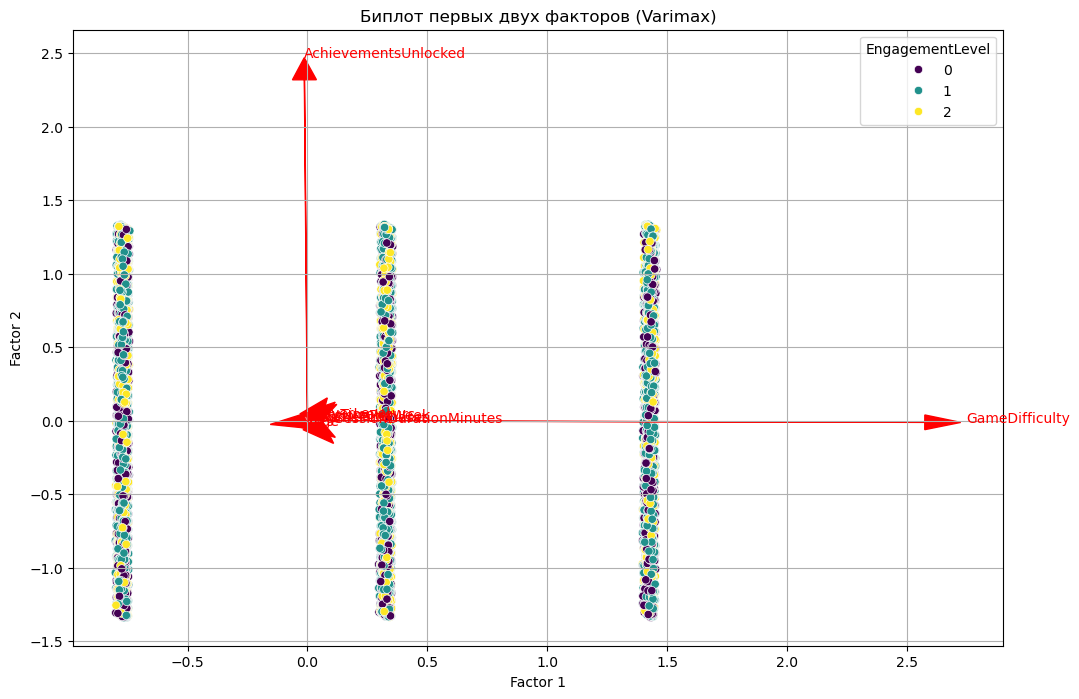

In [ ]:
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x=fa_varimax.transform(data_scaled)[:, 0],
    y=fa_varimax.transform(data_scaled)[:, 1],
    hue=df['EngagementLevel'],
    palette='viridis'
)

for i, var in enumerate(columns_to_use):
    plt.arrow(
        0, 0,
        loadings_varimax.iloc[i, 0]*3,
        loadings_varimax.iloc[i, 1]*3,
        color='r',
        head_width=0.1
    )
    plt.text(
        loadings_varimax.iloc[i, 0]*3.2,
        loadings_varimax.iloc[i, 1]*3.2,
        var,
        color='r'
    )

plt.title('Биплот первых двух факторов (Varimax)')
plt.xlabel('Factor 1')
plt.ylabel('Factor 2')
plt.grid()
plt.show()